## **0. Download dataset**
**Note:** If you can't download using gdown due to limited number of downloads, please download it manually and upload it to your drive, then copy it from the drive to colab.
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [1]:
# https://drive.google.com/file/d/11g2nEZsuhoL65Pgvp9YpfLLuswYJs5Yo/view?usp=sharing
!gdown --id 11g2nEZsuhoL65Pgvp9YpfLLuswYJs5Yo --quiet
# !unzip titanic.zip

/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


In [2]:
!mv titanic_modified_dataset.csv ../data/

## **1. Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #, LogisticRegression

## **2. Read dataset**

In [4]:
dataset_path = '../data/titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [6]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.359147,0.936027,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.638707,1.725341,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,16.000000,1.000000


## **3. Create train, val, test set**

In [7]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
print(X.shape)

(891, 8)


In [8]:
intercept = np.ones((
    X.shape[0], 1)
)
X_b = np.concatenate((intercept, X), axis=1)
print(X_b.shape)

(891, 9)


In [9]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 623
Number of val samples: 179
Number of test samples: 89


## **4. Normalization**

In [10]:
normalizer = StandardScaler() # z-score normalization
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [11]:
X_train

array([[ 1.        ,  0.8380325 , -0.73366996, ..., -0.34812766,
         0.89679528, -0.55130115],
       [ 1.        , -1.55141486, -0.73366996, ...,  1.76556546,
        -0.60106922, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.47988477,
        -0.60106922, -0.55130115],
       ...,
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.48238806,
         2.39465977, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.22655193,
        -0.60106922, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.05432564,
         2.39465977,  1.3289577 ]], shape=(623, 9))

## **5. Define essential functions**

### **5.1. Sigmoid function**

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### **5.2. Hypothesis function**

In [13]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = sigmoid(z)
    return y_hat

### **5.3. Binary Cross-entropy loss function**

In [14]:
def compute_loss(y, y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

### **5.4. Gradient function**

In [15]:
def compute_gradient(X, y, y_hat):
    m = X.shape[0]
    gradient = np.dot(X.T, (y_hat - y)) / m
    return gradient

### **5.5. Update weights function**

In [16]:
def update_gradient(theta, gradient, lr):
    return theta - lr * gradient

### **5.6. Accuracy function**

In [17]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

## **6. Training**

In [33]:
lr = 0.01
epochs = 300
batch_size = 16
random_state = 42
np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

In [34]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_i, y_hat)
        train_batch_losses.append(train_loss)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_gradient(theta, gradient, lr)

        # Accuracy
        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

        # Validation
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.842	Validation loss: 6.933

EPOCH 2:	Training loss: 0.790	Validation loss: 6.718

EPOCH 3:	Training loss: 0.745	Validation loss: 6.533

EPOCH 4:	Training loss: 0.707	Validation loss: 6.373

EPOCH 5:	Training loss: 0.674	Validation loss: 6.234

EPOCH 6:	Training loss: 0.646	Validation loss: 6.113

EPOCH 7:	Training loss: 0.621	Validation loss: 6.008

EPOCH 8:	Training loss: 0.599	Validation loss: 5.916

EPOCH 9:	Training loss: 0.580	Validation loss: 5.836

EPOCH 10:	Training loss: 0.564	Validation loss: 5.765

EPOCH 11:	Training loss: 0.549	Validation loss: 5.702

EPOCH 12:	Training loss: 0.537	Validation loss: 5.647

EPOCH 13:	Training loss: 0.525	Validation loss: 5.597

EPOCH 14:	Training loss: 0.515	Validation loss: 5.553

EPOCH 15:	Training loss: 0.507	Validation loss: 5.513

EPOCH 16:	Training loss: 0.499	Validation loss: 5.477

EPOCH 17:	Training loss: 0.492	Validation loss: 5.444

EPOCH 18:	Training loss: 0.486	Validation loss: 5.414

EPOCH 19:	Training

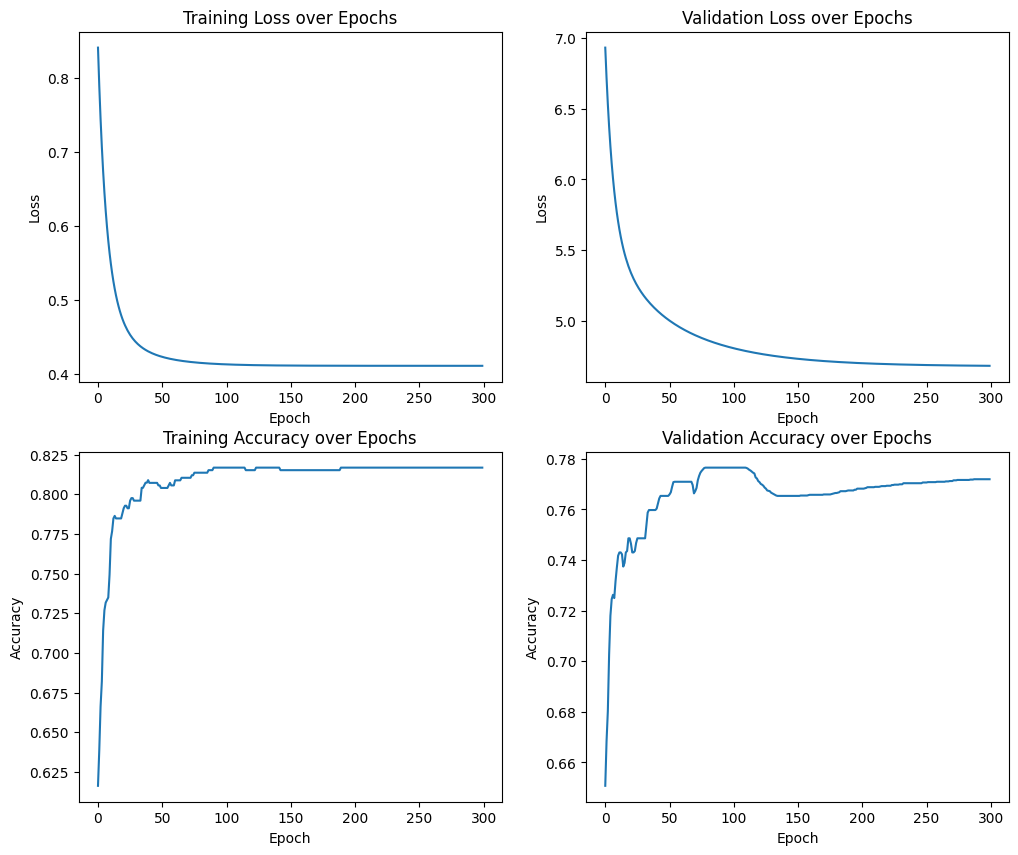

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, label='Train Loss')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss over Epochs')

ax[0, 1].plot(val_losses, label='Validation Loss')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss over Epochs')

ax[1, 0].plot(train_accs, label='Train Accuracy')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy over Epochs')

ax[1, 1].plot(val_accs, label='Validation Accuracy')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy over Epochs')

plt.show()

## **7. Evaluation**

In [36]:
# Val test set
val_set_acc =compute_accuracy(X_val, y_val, theta)
print(f'Validation set accuracy: {val_set_acc:.3f}')

Validation set accuracy: 0.771


In [37]:
# Test set evaluation
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Test set accuracy: {test_set_acc:.3f}')

Test set accuracy: 0.787
